In [188]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [245]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Data Handling

### Import Dataset

In [190]:
df = pd.read_csv("house_votes.txt")
df.head()

,index,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              435 non-null    int64 
 1   party              435 non-null    object
 2   infants            435 non-null    object
 3   water              435 non-null    object
 4   budget             435 non-null    object
 5   physician          435 non-null    object
 6   salvador           435 non-null    object
 7   religious          435 non-null    object
 8   satellite          435 non-null    object
 9   aid                435 non-null    object
 10  missile            435 non-null    object
 11  immigration        435 non-null    object
 12  synfuels           435 non-null    object
 13  education          435 non-null    object
 14  superfund          435 non-null    object
 15  crime              435 non-null    object
 16  duty_free_exports  435 non-null    object
 1

In [192]:
# Delete index column
del df["index"]

In [193]:
df["party"] = df["party"].replace({"republican": 1, "democrat": 0}) 

### Data Handling or Preparation

In [194]:
# Replace unrelistic values with null
df[df == "?"] = np.nan

In [195]:
# Print the number of NaNs
df.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [196]:
# Print shape of original DataFrame
df.shape

(435, 17)

### Support Vector Machine

In [197]:
X = df[df.columns.drop("party")]
y = df["party"]

In [198]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[0:20]

,Actual,Predicted
280,0,0
78,0,0
113,1,1
253,1,1
324,1,1
327,1,1
291,0,0
82,1,1
365,0,0
401,1,1


In [199]:
score = accuracy_score(y_test, y_pred)
score

0.9618320610687023

In [200]:
# Compute metrics
print(confusion_matrix(y_test, y_pred))

[[82  3]
 [ 2 44]]


In [201]:

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        85
           1       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



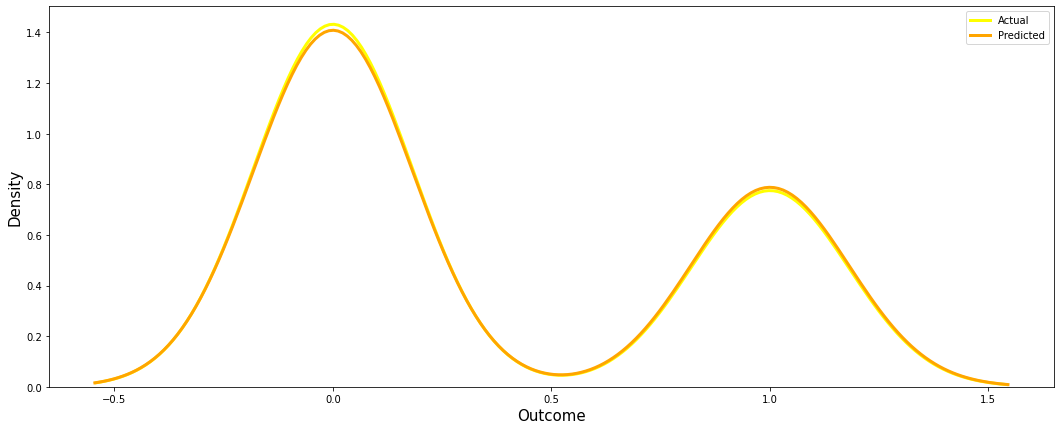

In [202]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

# Centering and Scaling

### Import Red Juice Dataset

In [203]:
df = pd.read_csv("winequality-red.csv", delimiter = ";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [204]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [205]:
# Data Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


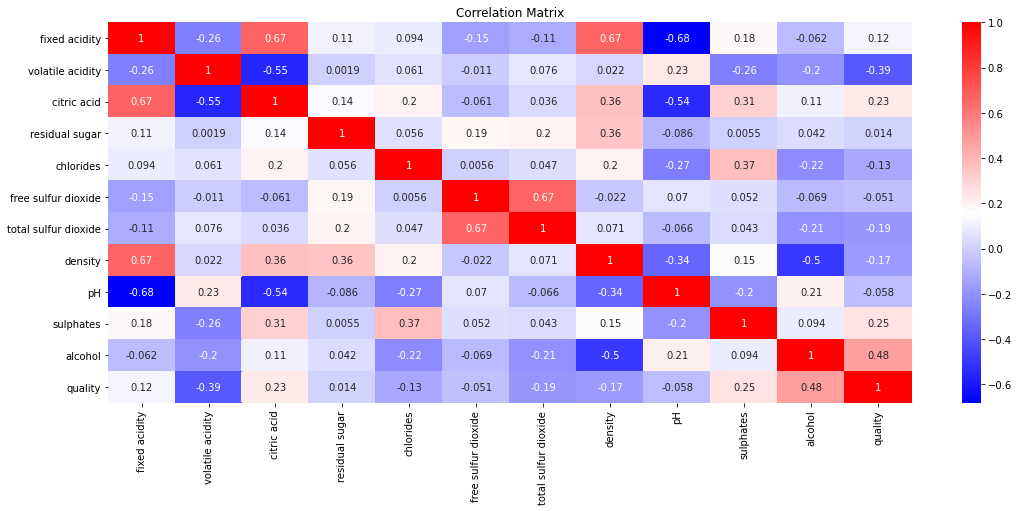

In [206]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, cmap = "bwr", annot = True)
plt.title("Correlation Matrix")
plt.show()

In [207]:
X = df[df.columns.drop("quality")]
y = df["quality"]

### Scaling in a pipeline

In [208]:
steps = [("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier())]

pipeline = Pipeline(steps)

x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.05,
                                                    random_state = 21)

knn_scaled = pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[0:20]

,Actual,Predicted
275,6,6
551,6,7
893,5,5
1535,6,5
494,6,6
1466,7,5
41,4,5
565,5,6
296,5,5
140,5,5


In [209]:
score = accuracy_score(y_test, y_pred)
score

0.5375

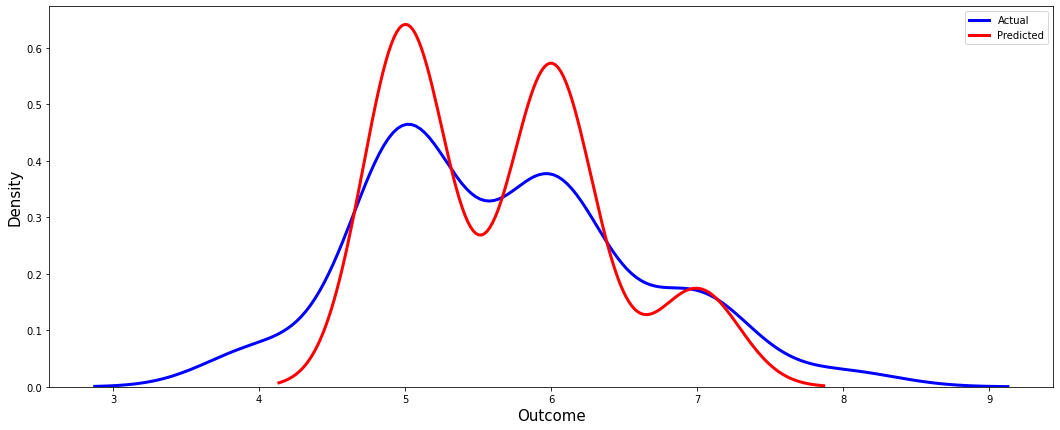

In [210]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()


### Cross Validation and Scaling in a pipeline

In [211]:
X = df[df.columns.drop("quality")]
y = df["quality"]

In [212]:
# Setup the pipeline steps: steps
steps = [("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1, 50)}

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 21)
cv = GridSearchCV(pipeline, param_grid = parameters)

cv.fit(x_train, y_train)

yhat = cv.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": yhat})[0:20]

,Actual,Predicted
275,6,6
551,6,6
893,5,5
1535,6,5
494,6,6
1466,7,7
41,4,5
565,5,5
296,5,6
140,5,5


In [213]:
cv.best_params_

{'knn__n_neighbors': 1}

In [214]:
score = accuracy_score(y_test, yhat)
score

0.5854166666666667

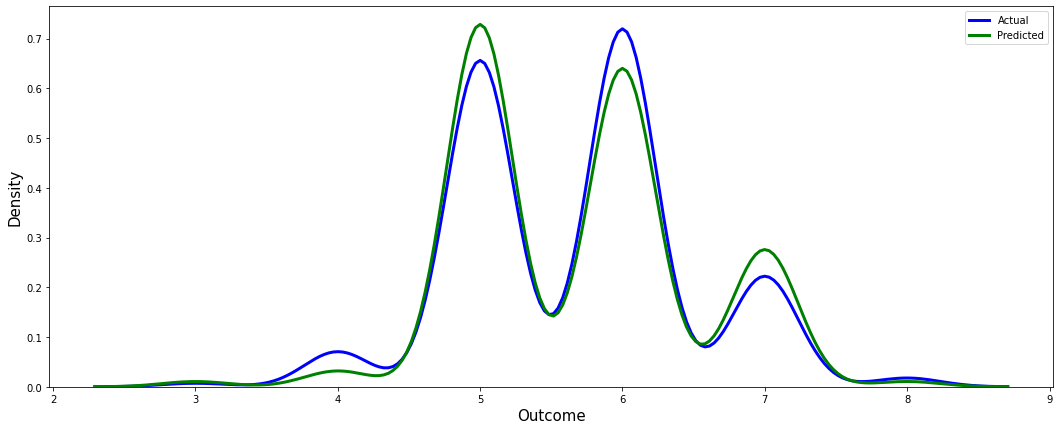

In [215]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "green")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

### Import White Juice Dataset

In [216]:
df = pd.read_csv("winequality-white.csv", delimiter = ";")
df = df.round(2)
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.04,30.0,136.0,0.99,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.04,28.0,129.0,0.99,3.22,0.45,11.0,6


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [218]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278236,0.334192,6.391415,0.045839,35.308085,138.360657,0.993738,3.188267,0.489847,10.514259,5.877909
std,0.843868,0.100834,0.121020,5.072058,0.022066,17.007137,42.498065,0.004889,0.151001,0.114126,1.230618,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.010000,2.000000,9.000000,0.990000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.040000,23.000000,108.000000,0.990000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.040000,34.000000,134.000000,0.990000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,1.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.350000,289.000000,440.000000,1.040000,3.820000,1.080000,14.200000,9.000000


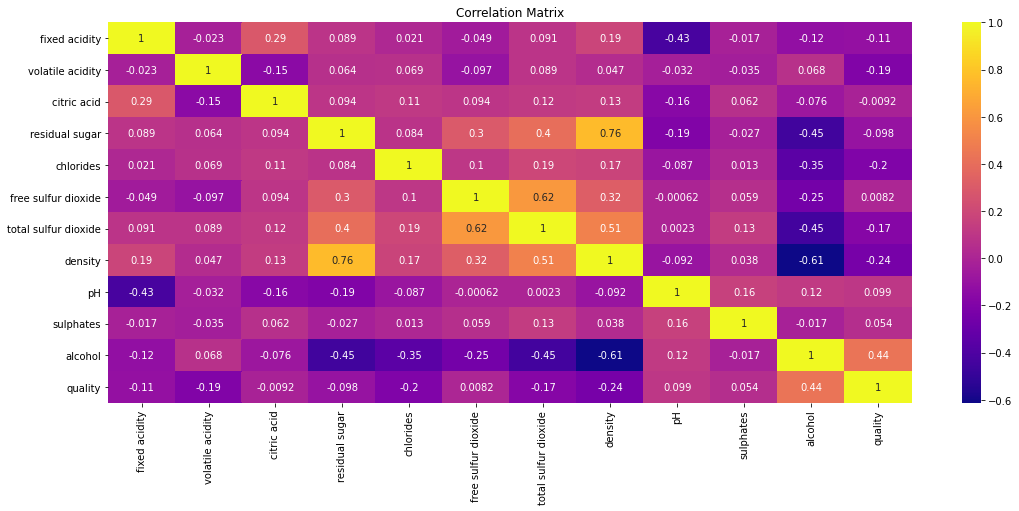

In [219]:
# Correlation
plt.figure(figsize = (18, 7))
correlation = df.corr()
sns.heatmap(correlation, cmap = "plasma", annot = True)
plt.title("Correlation Matrix")
plt.show()

### Centering and scaling in a pipeline

In [220]:
X = df[df.columns.drop("quality")]
y = df["quality"]

In [221]:
# Setup the pipeline steps: steps
steps = [("scaler", StandardScaler()),
         ("knn", KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(x_train, y_train)

# Prediction
yhat = knn_scaled.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": yhat})[0:20]

,Actual,Predicted
4656,7,6
3659,8,6
907,8,7
4352,5,5
3271,7,7
4632,6,6
2244,5,5
1924,4,5
3801,6,6
2634,5,5


In [222]:
score = accuracy_score(y_test, yhat)
score

0.5469387755102041

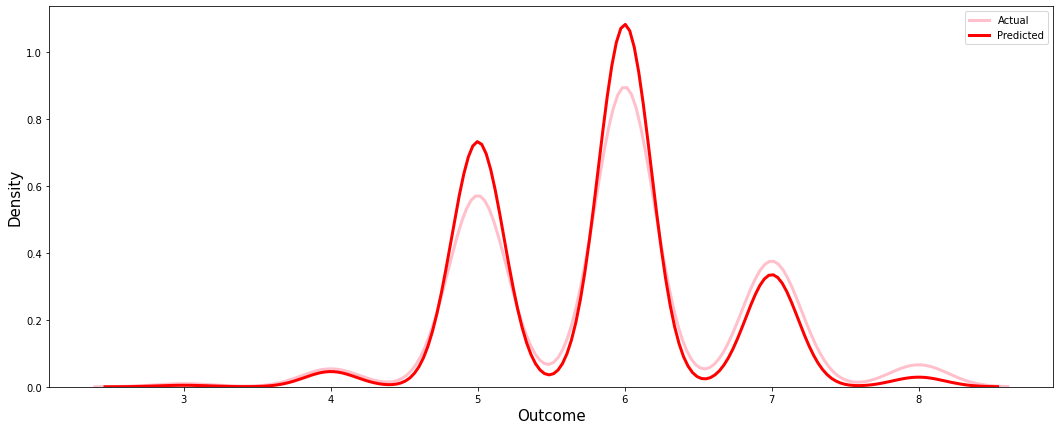

In [223]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(x = yhat, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

### Pipeline for classification

In [224]:
X = df[df.columns.drop("quality")]
y = df["quality"]

In [225]:
# Setup the pipeline
steps = [("scaler", StandardScaler()),
         ("SVM", SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {"SVM__C": [1, 10, 100],
              "SVM__gamma": [0.1, 0.01]}

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)


# Fit it to training set
cv.fit(x_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(x_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[0:20]

,Actual,Predicted
1555,7,6
3507,7,7
3138,6,6
1204,6,6
4205,6,6
1832,7,7
1984,8,6
659,4,5
1377,6,6
786,6,5


In [226]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score =", score)

Accuracy Score = 0.5775510204081633
